# 任务2：数据可视化

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## 赛题可视化

 1. 24小时巡游车统计数量；

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
taxigps2019 = pd.read_csv('taxiGps20190531.csv',
                         dtype = {
                             'DRIVING_DIRECTION': np.uint16,  # 正的值精确度要求无需太高，无符号
                             'OPERATING_STATUS': np.uint8,
                             'LONGITUDE': np.float32,
                             'LATITUDE': np.float32,
                             'GPS_SPEED': np.float16 
                         })

taxigps2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16828847 entries, 0 to 16828846
Data columns (total 7 columns):
OPERATING_STATUS     uint8
GPS_SPEED            float16
DRIVING_DIRECTION    uint16
GPS_TIME             object
LONGITUDE            float32
LATITUDE             float32
CARNO                object
dtypes: float16(1), float32(2), object(2), uint16(1), uint8(1)
memory usage: 465.4+ MB


In [4]:
taxigps2019 = taxigps2019[taxigps2019.columns[::-1]] # 把CARNO放在最前面
taxigps2019.sort_values(by=['CARNO','GPS_TIME'], inplace=True) #优先排CARNO,然后GPS_TIME，并置换不生成副本，覆盖原数据
taxigps2019.reset_index(inplace=True, drop=True) # 数据清洗可能会使索引顺序混乱，重新设置连续索引，丢弃原有的索引，并覆盖

In [25]:
taxigps2019

,CARNO,LATITUDE,LONGITUDE,GPS_TIME,DRIVING_DIRECTION,GPS_SPEED,OPERATING_STATUS
0,0006d282be70d06881a7513b69fcaa60,24.506195,118.128929,2019/5/31 10:00:11,12,9.203125,1
1,0006d282be70d06881a7513b69fcaa60,24.506210,118.128937,2019/5/31 10:00:26,10,0.000000,1
2,0006d282be70d06881a7513b69fcaa60,24.506210,118.128937,2019/5/31 10:00:41,10,0.000000,1
3,0006d282be70d06881a7513b69fcaa60,24.506210,118.128937,2019/5/31 10:00:56,10,0.000000,1
4,0006d282be70d06881a7513b69fcaa60,24.506210,118.128937,2019/5/31 10:01:11,10,0.000000,1
...,...,...,...,...,...,...,...
16828842,fff20f025f560278d601b2fd47e1f6b7,24.452690,118.160774,2019/5/31 9:57:44,94,0.000000,1
16828843,fff20f025f560278d601b2fd47e1f6b7,24.452690,118.160774,2019/5/31 9:58:14,94,0.000000,1
16828844,fff20f025f560278d601b2fd47e1f6b7,24.452690,118.160774,2019/5/31 9:58:45,94,0.000000,1
16828845,fff20f025f560278d601b2fd47e1f6b7,24.452690,118.160774,2019/5/31 9:59:15,94,0.000000,1


In [5]:
#统计记录最多的GPS小时
taxigps2019['GPS_TIME'] = pd.to_datetime(taxigps2019['GPS_TIME']) #转化成时间类型

In [6]:
taxigps2019['GPS_TIME_hour'] = taxigps2019['GPS_TIME'].dt.hour #dt.hour的用法
taxigps2019['GPS_TIME_hour'].value_counts()

23    1059242
22    1054752
10    1054140
9     1053138
21    1047899
20    1042931
8     1042160
19    1039729
17    1038851
18    1033548
7     1002225
6      903491
2      893999
4      859305
3      852674
5      816163
1      457019
11     439676
16     131282
0        2273
15       1394
14       1285
13        851
12        820
Name: GPS_TIME_hour, dtype: int64

Text(0, 0.5, 'Car Count')

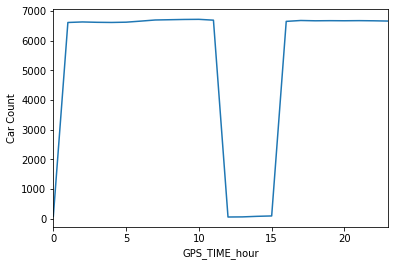

In [7]:
taxigps2019.groupby(['GPS_TIME_hour'])['CARNO'].nunique().plot()
plt.ylabel('Car Count')

2. 24小时巡游车平均GPS速度；

Text(0, 0.5, 'Mean_GPS_Speed')

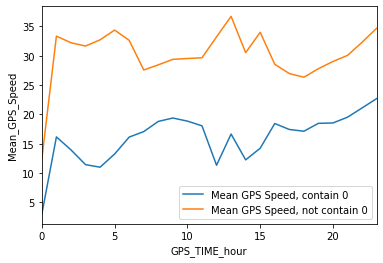

In [8]:
taxigps2019['GPS_SPEED'] = np.clip(taxigps2019['GPS_SPEED'], 0, 150) # numpy.clip(a, a_min, a_max, out=None)[source]
taxigps2019.groupby(['GPS_TIME_hour'])['GPS_SPEED'].mean().plot() # 求包括GPS速度为0的每小时平均值
taxigps2019[taxigps2019['GPS_SPEED'] != 0].groupby(['GPS_TIME_hour'])['GPS_SPEED'].mean().plot() # 求不包括GPS速度为0的每小时平均值
plt.legend(['Mean GPS Speed, contain 0', 'Mean GPS Speed, not contain 0'])
plt.ylabel('Mean_GPS_Speed')

<AxesSubplot:xlabel='GPS_TIME_hour'>

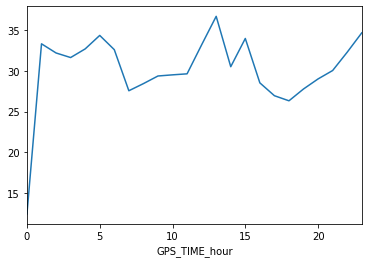

In [73]:
taxigps2019.loc[taxigps2019['GPS_SPEED'] != 0].groupby(['GPS_TIME_hour'])['GPS_SPEED'].mean().plot()

【思考】通过两个图的比较，你能发现什么规律？

【回答】相反趋势说明该时间段塞车严重，排除速度为0的车以后速度快了很多，说明速度不为0的车跑得贼快。

In [34]:
taxigps2019['GPS_SPEED'].value_counts()

0.000000      7060974
11.101562      237323
12.898438      195081
14.796875      170902
16.593750      160404
               ...   
127.375000          1
127.500000          1
146.875000          1
140.125000          1
141.875000          1
Name: GPS_SPEED, Length: 1452, dtype: int64

3. 24小时巡游车平均运营车辆；

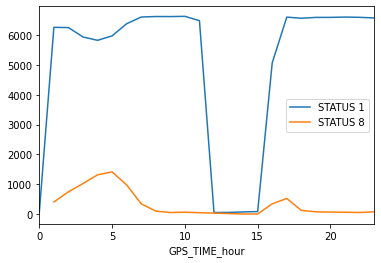

In [9]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

df = taxigps2019[taxigps2019['OPERATING_STATUS'] == 1] #状态1空车，状态8停运
df.groupby(['GPS_TIME_hour'])['CARNO'].nunique().plot()

df = taxigps2019[taxigps2019['OPERATING_STATUS'] == 8]
df.groupby(['GPS_TIME_hour'])['CARNO'].nunique().plot()

plt.legend(['STATUS 1', 'STATUS 8'])

4. 某个时间巡游车位置分布；

In [10]:
import folium
from folium import plugins
from folium.plugins import HeatMap
# 在地图上画车辆热力图
map_hooray = folium.Map(location=[24.482426, 118.157606], zoom_start=14) # zoom_start越大地图的比例尺越大
HeatMap(taxigps2019[['LATITUDE', 'LONGITUDE']].iloc[:1000].values).add_to(map_hooray) # 取前1000行的值
map_hooray

【参考】<https://python-visualization.github.io/folium/quickstart.html>

In [37]:
map_hooray.save('index.html')

In [60]:
taxigps2019[['LATITUDE', 'LONGITUDE']].iloc[:1000]
taxigps2019[['LATITUDE', 'LONGITUDE']].iloc[:1000].values

,LATITUDE,LONGITUDE
0,24.506195,118.128929
1,24.506210,118.128937
2,24.506210,118.128937
3,24.506210,118.128937
4,24.506210,118.128937
...,...,...
995,24.523493,118.105370
996,24.523413,118.104935
997,24.523319,118.104385
998,24.523319,118.104385


array([[ 24.506195, 118.12893 ],
       [ 24.50621 , 118.12894 ],
       [ 24.50621 , 118.12894 ],
       ...,
       [ 24.52332 , 118.104385],
       [ 24.52332 , 118.104385],
       [ 24.52332 , 118.104385]], dtype=float32)

5. 某个巡游车具体的路线；

In [11]:
import folium
# Create the map and add the line
m = folium.Map(location=[24.482426, 118.157606], zoom_start=13)
my_PolyLine=folium.PolyLine(locations=taxigps2019[taxigps2019['CARNO'] == '0006d282be70d06881a7513b69fcaa60'][['LATITUDE', 'LONGITUDE']].iloc[:50].values,weight=5) #weight：route粗细 opacity：透明度 color: 颜色
m.add_children(my_PolyLine) # 画子图

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  """


【参考】[Python Folium地理信息可视化案例](https://blog.csdn.net/folecld123/article/details/93508886)

## 课堂任务

1. 如何统计得到所有巡游车中运营时间最长的车？

In [70]:
taxigps2019['GPS_TIME_minute'] = taxigps2019['GPS_TIME'].dt.minute #dt.minute的用法
taxigps2019

,CARNO,LATITUDE,LONGITUDE,GPS_TIME,DRIVING_DIRECTION,GPS_SPEED,OPERATING_STATUS,GPS_TIME_hour,GPS_TIME_minute
0,0006d282be70d06881a7513b69fcaa60,24.506195,118.128929,2019-05-31 10:00:11,12,9.203125,1,10,0
1,0006d282be70d06881a7513b69fcaa60,24.506210,118.128937,2019-05-31 10:00:26,10,0.000000,1,10,0
2,0006d282be70d06881a7513b69fcaa60,24.506210,118.128937,2019-05-31 10:00:41,10,0.000000,1,10,0
3,0006d282be70d06881a7513b69fcaa60,24.506210,118.128937,2019-05-31 10:00:56,10,0.000000,1,10,0
4,0006d282be70d06881a7513b69fcaa60,24.506210,118.128937,2019-05-31 10:01:11,10,0.000000,1,10,1
...,...,...,...,...,...,...,...,...,...
16828842,fff20f025f560278d601b2fd47e1f6b7,24.452690,118.160774,2019-05-31 09:57:44,94,0.000000,1,9,57
16828843,fff20f025f560278d601b2fd47e1f6b7,24.452690,118.160774,2019-05-31 09:58:14,94,0.000000,1,9,58
16828844,fff20f025f560278d601b2fd47e1f6b7,24.452690,118.160774,2019-05-31 09:58:45,94,0.000000,1,9,58
16828845,fff20f025f560278d601b2fd47e1f6b7,24.452690,118.160774,2019-05-31 09:59:15,94,0.000000,1,9,59


In [69]:
taxigps2019[taxigps2019['CARNO']== '0006d282be70d06881a7513b69fcaa60']['GPS_TIME_minute'].value_counts().sum()

4604

In [72]:
taxigps2019['GPS_TIME'].diff().value_counts()

00:00:30             5770128
00:00:15             4207280
00:01:00              795292
00:00:16              540807
00:00:00              401751
                      ...   
-1 days +05:02:27          1
00:51:04                   1
-1 days +06:58:43          1
05:25:31                   1
-1 days +14:06:07          1
Name: GPS_TIME, Length: 4103, dtype: int64

2. 如何根据巡游车路线得到具体的运营规律？

In [74]:
taxigps2019[taxigps2019['CARNO'] == '0006d282be70d06881a7513b69fcaa60']

,CARNO,LATITUDE,LONGITUDE,GPS_TIME,DRIVING_DIRECTION,GPS_SPEED,OPERATING_STATUS,GPS_TIME_hour,GPS_TIME_minute
0,0006d282be70d06881a7513b69fcaa60,24.506195,118.128929,2019-05-31 10:00:11,12,9.203125,1,10,0
1,0006d282be70d06881a7513b69fcaa60,24.506210,118.128937,2019-05-31 10:00:26,10,0.000000,1,10,0
2,0006d282be70d06881a7513b69fcaa60,24.506210,118.128937,2019-05-31 10:00:41,10,0.000000,1,10,0
3,0006d282be70d06881a7513b69fcaa60,24.506210,118.128937,2019-05-31 10:00:56,10,0.000000,1,10,0
4,0006d282be70d06881a7513b69fcaa60,24.506210,118.128937,2019-05-31 10:01:11,10,0.000000,1,10,1
...,...,...,...,...,...,...,...,...,...
4599,0006d282be70d06881a7513b69fcaa60,24.504713,118.128647,2019-05-31 09:58:56,9,16.593750,1,9,58
4600,0006d282be70d06881a7513b69fcaa60,24.505180,118.128723,2019-05-31 09:59:11,8,0.000000,1,9,59
4601,0006d282be70d06881a7513b69fcaa60,24.505180,118.128723,2019-05-31 09:59:26,8,0.000000,1,9,59
4602,0006d282be70d06881a7513b69fcaa60,24.505180,118.128723,2019-05-31 09:59:41,8,0.000000,1,9,59


## 打卡任务

【注意】通过查资料发现20190606是端午，20190606-20190608三天是假期

1. 可视化巡游车20190531 - 20190609 期间早上9点的平均速度变化；

In [12]:
# 出租车2019年GPS，pd.concat()函数的使用
taxigps201906 = pd.concat([
    pd.read_csv('taxiGps20190531.csv', 
                         dtype = {
                             'DRIVING_DIRECTION': np.uint16,
                             'OPERATING_STATUS': np.uint8,
                             'LONGITUDE': np.float32,
                             'LATITUDE': np.float32,
                             'GPS_SPEED': np.float32 
                         }),
    pd.read_csv('taxiGps20190601.csv', 
                         dtype = {
                             'DRIVING_DIRECTION': np.uint16,
                             'OPERATING_STATUS': np.uint8,
                             'LONGITUDE': np.float32,
                             'LATITUDE': np.float32,
                             'GPS_SPEED': np.float32 
                         }),
    pd.read_csv('taxiGps20190602.csv', 
                         dtype = {
                             'DRIVING_DIRECTION': np.uint16,
                             'OPERATING_STATUS': np.uint8,
                             'LONGITUDE': np.float32,
                             'LATITUDE': np.float32,
                             'GPS_SPEED': np.float32 
                         }),
    pd.read_csv('taxiGps20190603.csv', 
                         dtype = {
                             'DRIVING_DIRECTION': np.uint16,
                             'OPERATING_STATUS': np.uint8,
                             'LONGITUDE': np.float32,
                             'LATITUDE': np.float32,
                             'GPS_SPEED': np.float32 
                         }),
    pd.read_csv('taxiGps20190604.csv', 
                         dtype = {
                             'DRIVING_DIRECTION': np.uint16,
                             'OPERATING_STATUS': np.uint8,
                             'LONGITUDE': np.float32,
                             'LATITUDE': np.float32,
                             'GPS_SPEED': np.float32 
                         }),
    pd.read_csv('taxiGps20190605.csv', 
                         dtype = {
                             'DRIVING_DIRECTION': np.uint16,
                             'OPERATING_STATUS': np.uint8,
                             'LONGITUDE': np.float32,
                             'LATITUDE': np.float32,
                             'GPS_SPEED': np.float32 
                         }),
    pd.read_csv('taxiGps20190606.csv', 
                         dtype = {
                             'DRIVING_DIRECTION': np.uint16,
                             'OPERATING_STATUS': np.uint8,
                             'LONGITUDE': np.float32,
                             'LATITUDE': np.float32,
                             'GPS_SPEED': np.float32 
                         }),
    pd.read_csv('taxiGps20190607.csv', 
                         dtype = {
                             'DRIVING_DIRECTION': np.uint16,
                             'OPERATING_STATUS': np.uint8,
                             'LONGITUDE': np.float32,
                             'LATITUDE': np.float32,
                             'GPS_SPEED': np.float32 
                         }),
    pd.read_csv('taxiGps20190608.csv', 
                         dtype = {
                             'DRIVING_DIRECTION': np.uint16,
                             'OPERATING_STATUS': np.uint8,
                             'LONGITUDE': np.float32,
                             'LATITUDE': np.float32,
                             'GPS_SPEED': np.float32 
                         }),
    pd.read_csv('taxiGps20190609.csv', 
                         dtype = {
                             'DRIVING_DIRECTION': np.uint16,
                             'OPERATING_STATUS': np.uint8,
                             'LONGITUDE': np.float32,
                             'LATITUDE': np.float32,
                             'GPS_SPEED': np.float32 
                         })
])
taxigps201906 = taxigps201906[taxigps201906.columns[::-1]]
taxigps201906.sort_values(by=['CARNO','GPS_TIME'], inplace=True)
taxigps201906.reset_index(inplace=True)

In [13]:
taxigps201906.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184854495 entries, 0 to 184854494
Data columns (total 8 columns):
index                int64
CARNO                object
LATITUDE             float32
LONGITUDE            float32
GPS_TIME             object
DRIVING_DIRECTION    uint16
GPS_SPEED            float32
OPERATING_STATUS     uint8
dtypes: float32(3), int64(1), object(2), uint16(1), uint8(1)
memory usage: 6.7+ GB


In [84]:
taxigps201906.iloc[:10000000].describe()

,index,LATITUDE,LONGITUDE,DRIVING_DIRECTION,GPS_SPEED,OPERATING_STATUS
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,9.732976e+06,2.751941e+01,1.249059e+02,1.686555e+02,1.760457e+01,3.043484e+00
std,6.058186e+06,3.108092e+00,8.546834e+00,1.098300e+02,2.093903e+01,2.502501e+00
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,4.622368e+06,2.447737e+01,1.180934e+02,7.300000e+01,0.000000e+00,1.000000e+00
50%,9.252098e+06,2.449516e+01,1.181201e+02,1.720000e+02,1.040000e+01,1.000000e+00
75%,1.432272e+07,2.452616e+01,1.181477e+02,2.620000e+02,3.140000e+01,6.000000e+00
max,2.392653e+07,4.332003e+01,1.299981e+02,3.600000e+02,4.192800e+03,8.000000e+00


In [90]:
taxigps201906.head()

,index,CARNO,LATITUDE,LONGITUDE,GPS_TIME,DRIVING_DIRECTION,GPS_SPEED,OPERATING_STATUS
0,7886250,0006d282be70d06881a7513b69fcaa60,24.506195,118.128929,2019/5/31 10:00:11,12,9.2,1
1,7890645,0006d282be70d06881a7513b69fcaa60,24.506210,118.128937,2019/5/31 10:00:26,10,0.0,1
2,7894659,0006d282be70d06881a7513b69fcaa60,24.506210,118.128937,2019/5/31 10:00:41,10,0.0,1
3,7899013,0006d282be70d06881a7513b69fcaa60,24.506210,118.128937,2019/5/31 10:00:56,10,0.0,1
4,7903647,0006d282be70d06881a7513b69fcaa60,24.506210,118.128937,2019/5/31 10:01:11,10,0.0,1


In [14]:
taxigps201906['GPS_TIME'] = pd.to_datetime(taxigps201906['GPS_TIME']) 

In [16]:
taxigps201906['GPS_TIME_hour'] = taxigps201906['GPS_TIME'].dt.hour #dt.hour的用法
taxigps201906['GPS_TIME_hour'].value_counts()

10    9833381
11    9731058
9     9379716
14    9357952
22    9343517
15    9331748
17    9323043
23    9317958
19    9278149
21    9269888
13    9268818
12    9257777
18    9253000
20    9249462
16    8607430
0     7711997
8     6271963
1     6078440
7     4888874
2     4818110
3     4321094
6     3860232
4     3808009
5     3292879
Name: GPS_TIME_hour, dtype: int64

In [17]:
taxigps201906['GPS_SPEED'] = np.clip(taxigps201906['GPS_SPEED'], 0, 150 )

In [18]:
taxigps201906[taxigps201906['GPS_TIME_hour']==9].groupby(taxigps201906['GPS_TIME'].dt.day)['GPS_SPEED'].mean()

GPS_TIME
1     18.861326
2     17.842346
3     19.189693
4     18.842819
5      9.153008
6     19.241146
7     18.848932
8     18.012955
9     18.262281
31    19.383568
Name: GPS_SPEED, dtype: float32

In [19]:
GPS_SPEED_mean=taxigps201906[taxigps201906['GPS_TIME_hour']==9].groupby(taxigps201906['GPS_TIME'].dt.day)['GPS_SPEED'].mean()

In [20]:
GPS_SPEED_mean[31]

19.383568

In [21]:
x=[31,1,2,3,4,5,6,7,8,9]
y=[]
for i in x:
        e=GPS_SPEED_mean[i]
        y.append(e)
print(y)

[19.383568, 18.861326, 17.842346, 19.189693, 18.84282, 9.153008, 19.241146, 18.848932, 18.012955, 18.262281]


In [22]:
x=['20190531','20190601','20190602','20190603','20190604','20190605','20190606','20190607','20190608','20190609']

(0.0, 20.0)

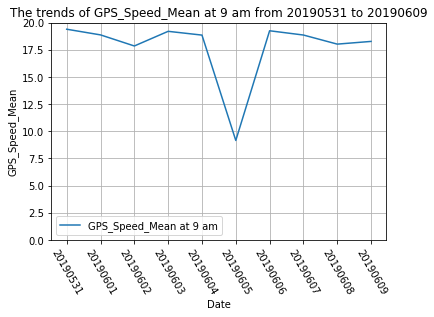

In [30]:
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('GPS_Speed_Mean')
plt.xticks(rotation=300)
plt.legend(['GPS_Speed_Mean at 9 am'],loc='best')
plt.title('The trends of GPS_Speed_Mean at 9 am from 20190531 to 20190609')
plt.grid()
plt.ylim([0,20])

2. 可视化统计巡游车20190531 - 20190609 期间平均每辆巡游车运营时间（一天之内活跃的分钟个数）变化

In [ ]:
# taxigps20190531['GPS_TIME_MH']=taxigps20190531['GPS_TIME'].dt.strftime('%H:%M') 别人提的方法

In [129]:
taxigps201906.CARNO.nunique()

6808

In [131]:
taxigps201906['GPS_TIME_day'] = taxigps201906['GPS_TIME'].dt.day

In [132]:
taxigps201906['GPS_TIME_minute'] = taxigps201906['GPS_TIME'].dt.minute

In [145]:
taxigps201906.head()

,index,CARNO,LATITUDE,LONGITUDE,GPS_TIME,DRIVING_DIRECTION,GPS_SPEED,OPERATING_STATUS,GPS_TIME_hour,GPS_TIME_day,GPS_TIME_minute
0,7886250,0006d282be70d06881a7513b69fcaa60,24.506195,118.128929,2019-05-31 10:00:11,12,9.2,1,10,31,0
1,7890645,0006d282be70d06881a7513b69fcaa60,24.506210,118.128937,2019-05-31 10:00:26,10,0.0,1,10,31,0
2,7894659,0006d282be70d06881a7513b69fcaa60,24.506210,118.128937,2019-05-31 10:00:41,10,0.0,1,10,31,0
3,7899013,0006d282be70d06881a7513b69fcaa60,24.506210,118.128937,2019-05-31 10:00:56,10,0.0,1,10,31,0
4,7903647,0006d282be70d06881a7513b69fcaa60,24.506210,118.128937,2019-05-31 10:01:11,10,0.0,1,10,31,1


In [142]:
dt=taxigps201906[['CARNO','GPS_TIME','GPS_SPEED','GPS_TIME_day','GPS_TIME_hour','GPS_TIME_minute']]

In [143]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184854495 entries, 0 to 184854494
Data columns (total 6 columns):
CARNO              object
GPS_TIME           datetime64[ns]
GPS_SPEED          float32
GPS_TIME_day       int64
GPS_TIME_hour      int64
GPS_TIME_minute    int64
dtypes: datetime64[ns](1), float32(1), int64(3), object(1)
memory usage: 7.6+ GB


In [149]:
dt['day_minute']=dt.GPS_TIME_hour*60+dt.GPS_TIME_minute

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [150]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184854495 entries, 0 to 184854494
Data columns (total 7 columns):
CARNO              object
GPS_TIME           datetime64[ns]
GPS_SPEED          float32
GPS_TIME_day       int64
GPS_TIME_hour      int64
GPS_TIME_minute    int64
day_minute         int64
dtypes: datetime64[ns](1), float32(1), int64(4), object(1)
memory usage: 9.0+ GB


In [151]:
dt[['GPS_TIME_day','GPS_TIME_hour','GPS_TIME_minute','day_minute']]=dt[['GPS_TIME_day','GPS_TIME_hour','GPS_TIME_minute','day_minute']].astype('int32')

E:\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [152]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184854495 entries, 0 to 184854494
Data columns (total 7 columns):
CARNO              object
GPS_TIME           datetime64[ns]
GPS_SPEED          float32
GPS_TIME_day       int32
GPS_TIME_hour      int32
GPS_TIME_minute    int32
day_minute         int32
dtypes: datetime64[ns](1), float32(1), int32(4), object(1)
memory usage: 6.2+ GB


In [176]:
pd.set_option('precision', 3)

In [178]:
round(dt[dt['GPS_TIME_day']==31].groupby(['CARNO'])['day_minute'].nunique().mean(),3)

973.081

In [184]:
y1=[973.081]
for i in range(1,10):
        d=round(dt[dt['GPS_TIME_day']==i].groupby(['CARNO'])['day_minute'].nunique().mean(),3)
        y1.append(d)
y1

[973.081,
 1038.711,
 554.128,
 888.651,
 1140.248,
 876.153,
 948.609,
 1374.225,
 1371.536,
 1377.227]

In [182]:
x1=['20190531','20190601','20190602','20190603','20190604','20190605','20190606','20190607','20190608','20190609']

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Operating_Time_Mean')

(0.0, 1400.0)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

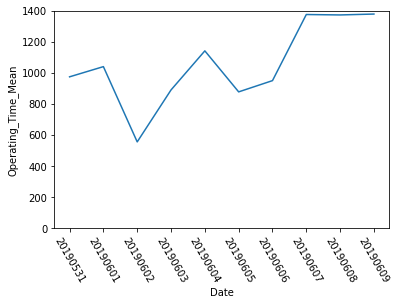

In [185]:
plt.plot(x1,y1)
plt.xlabel('Date')
plt.ylabel('Operating_Time_Mean')
plt.ylim([0,1400])
plt.xticks(rotation=300)